# Loading the data

In [42]:
import pandas as pd
df = pd.read_csv('weather.csv')

In [43]:
df

Row  Loc  MinT  MaxT  Rain WDir  WSpeed WDir9 WDir3  WSpeed9  \
1           Row0  ABX  13.4  22.9   0.6    W      44     W   WNW       20   
2           Row1  ABX   7.4  25.1   0.0  WNW      44   NNW   WSW        4   
3           Row2  ABX  17.5  32.3   1.0    W      41   ENE    NW        7   
4           Row3  ABX  14.6  29.7   0.2  WNW      56     W     W       19   
5           Row4  ABX   7.7  26.7   0.0    W      35   SSE     W        6   
...          ...  ...   ...   ...   ...  ...     ...   ...   ...      ...   
99512  Row101816  URU   8.0  20.7   0.0  ESE      41    SE     E       19   
99513  Row101817  URU   3.5  21.8   0.0    E      31   ESE     E       15   
99514  Row101818  URU   2.8  23.4   0.0    E      31    SE   ENE       13   
99515  Row101819  URU   3.6  25.3   0.0  NNW      22    SE     N       13   
99516  Row101820  URU   5.4  26.9   0.0    N      37    SE   WNW        9   

       WSpeed3  Hum9  Hum3  Press9  Press3  Temp9  Temp3 Rtod RTom  
1           24    71    22  1007.7  1007.1   16.9   21.8   No   No  
2           22    44    25  1010.6  1007.8   17.2   24.3   No   No  
3           20    82    33  1010.8  1006.0   17.8   29.7   No   No  
4           24    55    23  1009.2  1005.4   20.6   28.9   No   No  
5           17    48    19  1013.4  1010.1   16.3   25.5   No   No  
...        ...   ...   ...     ...     ...    ...    ...  ...  ...  
99512       26    56    32  1028.1  1024.3   11.6   20.0   No   No  
99513       13    59    27  1024.7  1021.2    9.4   20.9   No   No  
99514       11    51    24  1024.6  1020.3   10.1   22.4   No   No  
99515        9    56    21  1023.5  1019.1   10.9   24.5   No   No  
99516        9    53    24  1021.0  1016.8   12.5   26.1   No   No  

[86604 rows x 19 columns]

# Little preprocessing

As we can see, the first column can be removed because it doesn't give us any information about the dataset, we will save this dataset to use the different models. 

In [44]:
df = df.drop(columns=['Row'])

In [45]:
df

Loc  MinT  MaxT  Rain WDir  WSpeed WDir9 WDir3  WSpeed9  WSpeed3  Hum9  \
1      ABX  13.4  22.9   0.6    W      44     W   WNW       20       24    71   
2      ABX   7.4  25.1   0.0  WNW      44   NNW   WSW        4       22    44   
3      ABX  17.5  32.3   1.0    W      41   ENE    NW        7       20    82   
4      ABX  14.6  29.7   0.2  WNW      56     W     W       19       24    55   
5      ABX   7.7  26.7   0.0    W      35   SSE     W        6       17    48   
...    ...   ...   ...   ...  ...     ...   ...   ...      ...      ...   ...   
99512  URU   8.0  20.7   0.0  ESE      41    SE     E       19       26    56   
99513  URU   3.5  21.8   0.0    E      31   ESE     E       15       13    59   
99514  URU   2.8  23.4   0.0    E      31    SE   ENE       13       11    51   
99515  URU   3.6  25.3   0.0  NNW      22    SE     N       13        9    56   
99516  URU   5.4  26.9   0.0    N      37    SE   WNW        9        9    53   

       Hum3  Press9  Press3  Temp9  Temp3 Rtod RTom  
1        22  1007.7  1007.1   16.9   21.8   No   No  
2        25  1010.6  1007.8   17.2   24.3   No   No  
3        33  1010.8  1006.0   17.8   29.7   No   No  
4        23  1009.2  1005.4   20.6   28.9   No   No  
5        19  1013.4  1010.1   16.3   25.5   No   No  
...     ...     ...     ...    ...    ...  ...  ...  
99512    32  1028.1  1024.3   11.6   20.0   No   No  
99513    27  1024.7  1021.2    9.4   20.9   No   No  
99514    24  1024.6  1020.3   10.1   22.4   No   No  
99515    21  1023.5  1019.1   10.9   24.5   No   No  
99516    24  1021.0  1016.8   12.5   26.1   No   No  

[86604 rows x 18 columns]

We will create a dictionary to transform our categorial data to a numerical one.

In [46]:
import numpy as np
translateCoords = {}
for index, element in enumerate(np.unique(df['WDir9'])):
    translateCoords[element] = index

translateCoords

{'E': 0,
 'ENE': 1,
 'ESE': 2,
 'N': 3,
 'NE': 4,
 'NNE': 5,
 'NNW': 6,
 'NW': 7,
 'S': 8,
 'SE': 9,
 'SSE': 10,
 'SSW': 11,
 'SW': 12,
 'W': 13,
 'WNW': 14,
 'WSW': 15}

In [47]:
columnas = ['WDir','WDir9','WDir3']

In [48]:
for columna in columnas:
    df[columna] = df[columna].map(translateCoords)
df

Loc  MinT  MaxT  Rain  WDir  WSpeed  WDir9  WDir3  WSpeed9  WSpeed3  \
1      ABX  13.4  22.9   0.6    13      44     13     14       20       24   
2      ABX   7.4  25.1   0.0    14      44      6     15        4       22   
3      ABX  17.5  32.3   1.0    13      41      1      7        7       20   
4      ABX  14.6  29.7   0.2    14      56     13     13       19       24   
5      ABX   7.7  26.7   0.0    13      35     10     13        6       17   
...    ...   ...   ...   ...   ...     ...    ...    ...      ...      ...   
99512  URU   8.0  20.7   0.0     2      41      9      0       19       26   
99513  URU   3.5  21.8   0.0     0      31      2      0       15       13   
99514  URU   2.8  23.4   0.0     0      31      9      1       13       11   
99515  URU   3.6  25.3   0.0     6      22      9      3       13        9   
99516  URU   5.4  26.9   0.0     3      37      9     14        9        9   

       Hum9  Hum3  Press9  Press3  Temp9  Temp3 Rtod RTom  
1        71    22  1007.7  1007.1   16.9   21.8   No   No  
2        44    25  1010.6  1007.8   17.2   24.3   No   No  
3        82    33  1010.8  1006.0   17.8   29.7   No   No  
4        55    23  1009.2  1005.4   20.6   28.9   No   No  
5        48    19  1013.4  1010.1   16.3   25.5   No   No  
...     ...   ...     ...     ...    ...    ...  ...  ...  
99512    56    32  1028.1  1024.3   11.6   20.0   No   No  
99513    59    27  1024.7  1021.2    9.4   20.9   No   No  
99514    51    24  1024.6  1020.3   10.1   22.4   No   No  
99515    56    21  1023.5  1019.1   10.9   24.5   No   No  
99516    53    24  1021.0  1016.8   12.5   26.1   No   No  

[86604 rows x 18 columns]

In [49]:
translateYN = {}
for index, element in enumerate(np.unique(df['Rtod'])):
    translateYN[element] = index
translateYN

{'No': 0, 'Yes': 1}

In [50]:
columnas = ['Rtod', 'RTom']

In [51]:
for columna in columnas:
    df[columna] = df[columna].map(translateYN)
df

Loc  MinT  MaxT  Rain  WDir  WSpeed  WDir9  WDir3  WSpeed9  WSpeed3  \
1      ABX  13.4  22.9   0.6    13      44     13     14       20       24   
2      ABX   7.4  25.1   0.0    14      44      6     15        4       22   
3      ABX  17.5  32.3   1.0    13      41      1      7        7       20   
4      ABX  14.6  29.7   0.2    14      56     13     13       19       24   
5      ABX   7.7  26.7   0.0    13      35     10     13        6       17   
...    ...   ...   ...   ...   ...     ...    ...    ...      ...      ...   
99512  URU   8.0  20.7   0.0     2      41      9      0       19       26   
99513  URU   3.5  21.8   0.0     0      31      2      0       15       13   
99514  URU   2.8  23.4   0.0     0      31      9      1       13       11   
99515  URU   3.6  25.3   0.0     6      22      9      3       13        9   
99516  URU   5.4  26.9   0.0     3      37      9     14        9        9   

       Hum9  Hum3  Press9  Press3  Temp9  Temp3  Rtod  RTom  
1        71    22  1007.7  1007.1   16.9   21.8     0     0  
2        44    25  1010.6  1007.8   17.2   24.3     0     0  
3        82    33  1010.8  1006.0   17.8   29.7     0     0  
4        55    23  1009.2  1005.4   20.6   28.9     0     0  
5        48    19  1013.4  1010.1   16.3   25.5     0     0  
...     ...   ...     ...     ...    ...    ...   ...   ...  
99512    56    32  1028.1  1024.3   11.6   20.0     0     0  
99513    59    27  1024.7  1021.2    9.4   20.9     0     0  
99514    51    24  1024.6  1020.3   10.1   22.4     0     0  
99515    56    21  1023.5  1019.1   10.9   24.5     0     0  
99516    53    24  1021.0  1016.8   12.5   26.1     0     0  

[86604 rows x 18 columns]

In [52]:
translateCity = {}
for index, element in enumerate(np.unique(df['Loc'])):
    translateCity[element] = index
translateCity

{'ABX': 0,
 'ADEL': 1,
 'ASP': 2,
 'BC': 3,
 'BLL': 4,
 'BNE': 5,
 'BXG': 6,
 'CBR': 7,
 'CHR': 8,
 'CNS': 9,
 'COB': 10,
 'DRW': 11,
 'DTR': 12,
 'GCT': 13,
 'HBT': 14,
 'KTE': 15,
 'LCT': 16,
 'MBE': 17,
 'MBEA': 18,
 'MEE': 19,
 'MGI': 20,
 'MGR': 21,
 'MLD': 22,
 'NFI': 23,
 'NHD': 24,
 'NHIL': 25,
 'NTA': 26,
 'PRF': 27,
 'PRH': 28,
 'PRHA': 29,
 'PRL': 30,
 'PRT': 31,
 'RHD': 32,
 'SALE': 33,
 'SGS': 34,
 'SYD': 35,
 'SYDA': 36,
 'TGG': 37,
 'TVE': 38,
 'URU': 39,
 'WAG': 40,
 'WLG': 41,
 'WLT': 42,
 'WMA': 43,
 'WPE': 44,
 'WTF': 45,
 'WTS': 46}

In [53]:
columnas = ['Loc']

In [54]:
for columna in columnas:
    df[columna] = df[columna].map(translateCity)
df

Loc  MinT  MaxT  Rain  WDir  WSpeed  WDir9  WDir3  WSpeed9  WSpeed3  \
1        0  13.4  22.9   0.6    13      44     13     14       20       24   
2        0   7.4  25.1   0.0    14      44      6     15        4       22   
3        0  17.5  32.3   1.0    13      41      1      7        7       20   
4        0  14.6  29.7   0.2    14      56     13     13       19       24   
5        0   7.7  26.7   0.0    13      35     10     13        6       17   
...    ...   ...   ...   ...   ...     ...    ...    ...      ...      ...   
99512   39   8.0  20.7   0.0     2      41      9      0       19       26   
99513   39   3.5  21.8   0.0     0      31      2      0       15       13   
99514   39   2.8  23.4   0.0     0      31      9      1       13       11   
99515   39   3.6  25.3   0.0     6      22      9      3       13        9   
99516   39   5.4  26.9   0.0     3      37      9     14        9        9   

       Hum9  Hum3  Press9  Press3  Temp9  Temp3  Rtod  RTom  
1        71    22  1007.7  1007.1   16.9   21.8     0     0  
2        44    25  1010.6  1007.8   17.2   24.3     0     0  
3        82    33  1010.8  1006.0   17.8   29.7     0     0  
4        55    23  1009.2  1005.4   20.6   28.9     0     0  
5        48    19  1013.4  1010.1   16.3   25.5     0     0  
...     ...   ...     ...     ...    ...    ...   ...   ...  
99512    56    32  1028.1  1024.3   11.6   20.0     0     0  
99513    59    27  1024.7  1021.2    9.4   20.9     0     0  
99514    51    24  1024.6  1020.3   10.1   22.4     0     0  
99515    56    21  1023.5  1019.1   10.9   24.5     0     0  
99516    53    24  1021.0  1016.8   12.5   26.1     0     0  

[86604 rows x 18 columns]

Next command block is for loading the data

In [55]:
elementos = np.unique(df['RTom'], )
x = []
y = []
for elemento in elementos:
    x.append(elemento)
    y.append(np.sum(df['RTom'] == elemento))

No 67356
Yes 19248


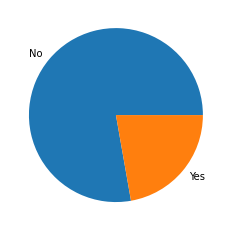

In [56]:
import matplotlib.pyplot as plt

plt.pie(y, labels = ['No', 'Yes']);
print('No', y[0])
print('Yes', y[1])

As we can see, we are in front of an unbalanced dataset so we will try to balanced it and keeping the sense of the dataset

In [57]:
no = np.unique(df[df['RTom'] == 0]['Loc'], return_counts=True)
no

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64),
 array([1358, 1473, 1763, 1388, 1501, 1648, 1543, 1557, 1266, 1397, 1788,
        1601, 1125, 1445, 1651,  849, 1318, 1199, 1635, 1604, 1253, 1418,
        1822, 1346, 1390,  932, 1588, 1450, 1710, 1697, 1280, 1309, 1151,
        1514, 1651, 1194, 1532, 1327, 1668,  908, 1591, 1511, 1206, 1868,
        1178, 1295, 1458], dtype=int64))

In [58]:
yes = np.unique(df[df['RTom'] == 1]['Loc'], return_counts=True)
yes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64),
 array([375, 456, 158, 334, 522, 458, 340, 355, 534, 643, 258, 564, 580,
        515, 532, 156, 384, 364, 456, 249, 508, 625, 223, 632, 547, 168,
        389, 291, 453, 418, 762, 352, 289, 413, 327, 419, 524, 313, 333,
         81, 357, 456, 368, 131, 611, 561, 464], dtype=int64))

In [59]:
X = 250
ciudadesMasDeX = yes[1] >= X

In [60]:
ciudades = yes[0][ciudadesMasDeX]
ciudades

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       40, 41, 42, 44, 45, 46], dtype=int64)

In [61]:
df = df[df['Loc'].isin(ciudades)]

In [62]:
indices = []
vacio = pd.DataFrame()

for ciudad in ciudades:
    actualCiudad = df['Loc'] == ciudad
    
    actualNo = df['RTom'] == 0
    a = df[actualCiudad & actualNo].sample(n=X)
    
    actualSi = df['RTom'] == 1
    if df[actualCiudad & actualSi].shape[0] > 500:
        b = df[actualCiudad & actualSi].sample(n=X)
    else:
        b = df[actualCiudad & actualSi]
    
    vacio = pd.concat([vacio, a, b], ignore_index=True)

No 10000
Yes 13172


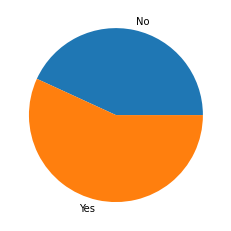

In [63]:
elementos = np.unique(vacio['RTom'], )
x = []
y = []
for elemento in elementos:
    x.append(elemento)
    y.append(np.sum(vacio['RTom'] == elemento))

plt.pie(y, labels = ['No', 'Yes']);
print('No', y[0])
print('Yes', y[1])

In [64]:
df = vacio

In [65]:
no = np.unique(df[df['RTom'] == 0]['Loc'], return_counts=True)
no

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        40, 41, 42, 44, 45, 46], dtype=int64),
 array([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250], dtype=int64))

In [66]:
yes = np.unique(df[df['RTom'] == 1]['Loc'], return_counts=True)
yes

(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
        20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        40, 41, 42, 44, 45, 46], dtype=int64),
 array([375, 456, 334, 250, 458, 340, 355, 250, 250, 258, 250, 250, 250,
        250, 384, 364, 456, 250, 250, 250, 250, 389, 291, 453, 418, 250,
        352, 289, 413, 327, 419, 250, 313, 333, 357, 456, 368, 250, 250,
        464], dtype=int64))

In [67]:
df.to_csv('weatherDef.csv', index=False)

# A little look

In [1]:
import pandas as pd
df = pd.read_csv('weatherDef.csv')
df

Loc  MinT  MaxT  Rain  WDir  WSpeed  WDir9  WDir3  WSpeed9  WSpeed3  \
0        0  10.0  26.2   0.0    14      37      0     14        4       20   
1        0  14.3  21.6  19.2    15      50     14     15        9       28   
2        0   0.2  13.6   0.0    14      30      2     13        7       19   
3        0  17.5  30.0   1.0    12      43      0     13        6       30   
4        0  15.2  26.3   0.0    13      43     15     13       20       26   
...    ...   ...   ...   ...   ...     ...    ...    ...      ...      ...   
23167   46   8.0  15.2   2.4    15      39     14     15       11       22   
23168   46   7.0  20.1   0.0    15      46      5     13       19       15   
23169   46   9.8  17.3   0.0     5      52      5      5       20       15   
23170   46   3.6  15.1   0.6     3      37      4      7        6       13   
23171   46   7.2  12.6   1.8     3      48     14     12        9       17   

       Hum9  Hum3  Press9  Press3  Temp9  Temp3  Rtod  RTom  
0        67    25  1013.8  1011.8   17.1   24.9     0     0  
1        98    44  1011.8  1010.3   14.5   20.2     1     0  
2       100    50  1022.9  1020.5    4.0   13.0     0     0  
3        75    35  1005.4  1000.5   22.2   28.4     0     0  
4        54    24  1010.9  1009.8   19.4   24.8     0     0  
...     ...   ...     ...     ...    ...    ...   ...   ...  
23167    85    64  1020.0  1021.1   11.2   12.4     1     1  
23168    65    94  1019.9  1018.6   14.8   14.0     0     1  
23169    81    65  1017.8  1012.5   13.8   16.5     0     1  
23170    96    54  1019.6  1019.3    7.3   13.3     0     1  
23171   100    65  1021.6  1023.5    9.8   11.2     1     1  

[23172 rows x 18 columns]

First we will split our variables from our objective.

In [2]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

Now we will split into sets of training and test the data.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = X['Loc'])

## PCA

We will standarize the data using the train data to fit a transform on the test set.

Now that we have our data Standarizet, we can apply PCA to see how the data looks like

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

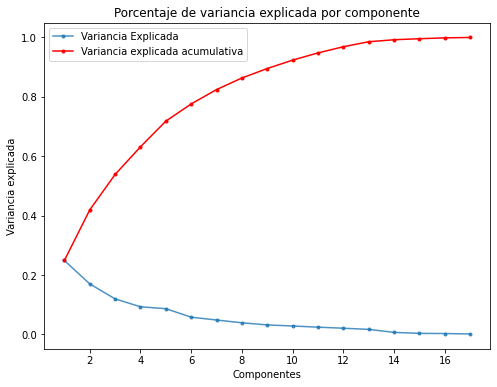

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X_train_std);
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

In [6]:
varianzaAcumulada = np.cumsum(pca.explained_variance_ratio_)
index = 0
while varianzaAcumulada[index] < 0.80:
    index += 1
print('Dimnesiones ', index + 1)
print('Varianza acumulada ', varianzaAcumulada[index])

Dimnesiones  7
Varianza acumulada  0.8244501362067128


As we can see, with only 7 dimensions we can get an accumulated variance of 0.85

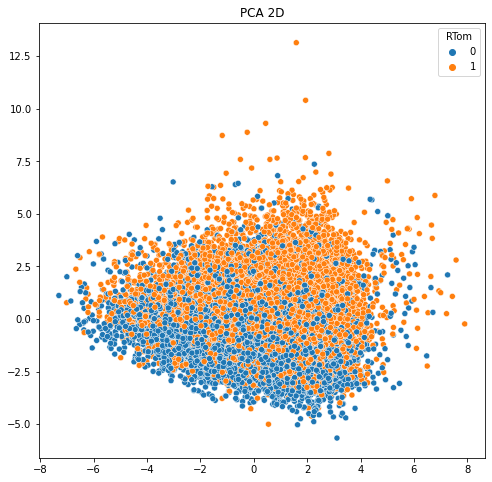

In [33]:
import seaborn as sns
X_trans = pca.transform(X_train_std)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train).set(title='PCA 2D');

In [34]:
import plotly.express as px

fig = px.scatter_3d(dict(PC1 = X_trans[:,0], PC2 = X_trans[:,1], PC3 = X_trans[:,2]), x='PC1', y='PC2', z='PC3', color=y_train, title = 'PCA 3D')
fig.show()

## TSNE

### With no preprocessed data

In [35]:
from sklearn.manifold import TSNE

_, X_muestra, _, y_muestra = train_test_split(X, y, test_size=0.05, random_state=0, stratify = X['Loc'])
weather_TSNE = TSNE(n_components=3, perplexity=10,n_iter=2000, init='random').fit_transform(X_muestra)

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

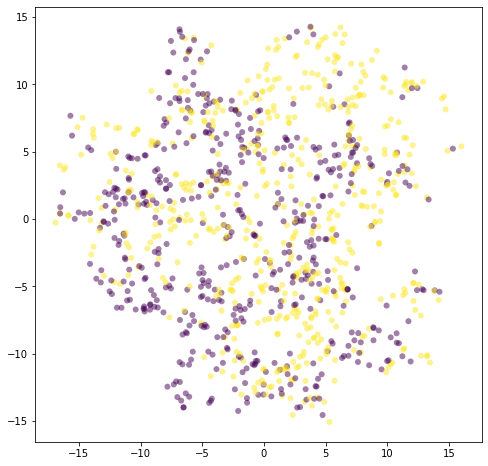

In [36]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(weather_TSNE[:, 0], weather_TSNE[:, 1], c = y_muestra, edgecolor = 'none', alpha = 0.5)

In [37]:
fig = px.scatter_3d(dict(PC1 = weather_TSNE[:,0], PC2 = weather_TSNE[:,1], PC3 = weather_TSNE[:,2]), x='PC1', y='PC2', z='PC3', color=y_muestra, title = 'PCA 3D')
fig.show()

### With standarized data

In [38]:
scaler = StandardScaler()

X_train_std_arr = scaler.fit_transform(X_muestra)

In [39]:
weather_TSNE_std = TSNE(n_components=3, perplexity=10,n_iter=2000, init='random').fit_transform(X_train_std_arr)

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

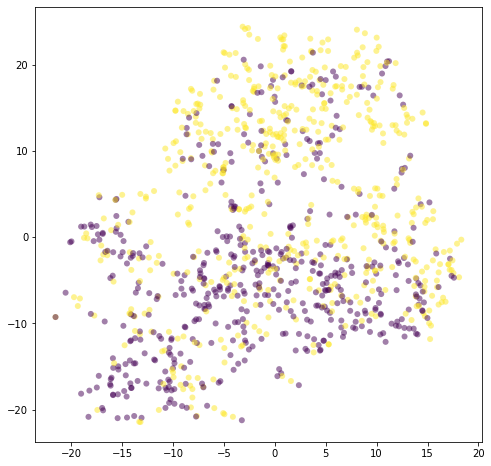

In [40]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(weather_TSNE_std[:, 0], weather_TSNE_std[:, 1], c = y_muestra, edgecolor = 'none', alpha = 0.5)

In [41]:
fig = px.scatter_3d(dict(PC1 = weather_TSNE_std[:,0], PC2 = weather_TSNE_std[:,1], PC3 = weather_TSNE_std[:,2]), x='PC1', y='PC2', z='PC3', color=y_muestra, title = 'PCA 3D')
fig.show()